In [1]:
from functions import *

In [2]:
get_list_of_zip_files(directory="C:\\Users\\KonuTech")[0:2]

['home-data-for-ml-course.zip',
 'house-prices-advanced-regression-techniques.zip']

In [3]:
unzip_files(directory="C:\\Users\\KonuTech"
            ,output_directory="C:\\Users\\KonuTech\\Downloads\\house-prices-advanced-regression-techniques"
            ,zip_file_name="house-prices-advanced-regression-techniques.zip")

Unpacked house-prices-advanced-regression-techniques.zip to: C:\Users\KonuTech\Downloads\house-prices-advanced-regression-techniques



In [4]:
change_current_working_directory(directory="C:\\Users\\KonuTech\\Downloads\\house-prices-advanced-regression-techniques")

'C:\\Users\\KonuTech\\Downloads\\house-prices-advanced-regression-techniques'

In [5]:
get_list_of_files_by_extension(directory="C:\\Users\\KonuTech\\Downloads\\house-prices-advanced-regression-techniques"
                               ,extension="csv")

['sample_submission.csv', 'submission.csv', 'test.csv', 'train.csv']

# Data description

In [6]:
#f = open("data_description.txt", "r")
#print(f.read())

# Train data

In [7]:
train = pd.read_csv('train.csv')
train = train.drop(columns="Id", axis=1)
#train

In [8]:
train.shape

(1460, 80)

### Transformation of Int columns to Float columns

In [9]:
#train[train.select_dtypes(include=['int64']).columns] = train[train.select_dtypes(include=['int64']).columns].astype(float)
train[train.select_dtypes(include=['int64', "uint8"]).columns] = train[train.select_dtypes(include=['int64', "uint8"]).columns].astype(float)

In [10]:
#round(train.describe(),2)

In [11]:
#train.describe(include='object')

# DEALING WITH NULL VALUES

#### Number of columns with Null values

In [12]:
(train.isnull().sum() > 0).sum()

19

### Summary statistics of mising data

#### Counts

In [13]:
missing_data_count = pd.DataFrame(train.isnull().sum().sort_values(ascending=False))
#missing_data_count.T

In [14]:
#round(missing_data_count[missing_data_count > 0].describe(),3).T

#### Percetages

In [15]:
missing_data_percentage = pd.DataFrame(((train.isnull().sum().sort_values(ascending=False))/train.shape[0]))
#missing_data_percentage.T

In [16]:
#round(missing_data_percentage[missing_data_percentage > 0].describe(),3).T

# Imputation of Null values

## Floats columns imputation

### Find float columns with missing values

In [17]:
floats_with_nulls = pd.DataFrame(train.select_dtypes(include=['float64']).isnull().sum()) > 0
floats_with_nulls = floats_with_nulls[floats_with_nulls[0] == True].T.columns
floats_with_nulls

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

### Print counts of unique values including Null values

In [18]:
count_unique_values(dataframe=train
                    ,variables=floats_with_nulls)

LotFrontage count distinct:
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
38.0       1
138.0      1
140.0      1
137.0      1
nan      259
Length: 111, dtype: int64

MasVnrArea count distinct:
0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
337.0      1
415.0      1
293.0      1
621.0      1
nan        8
Length: 328, dtype: int64

GarageYrBlt count distinct:
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1933.0     1
1900.0     1
1906.0     1
nan       81
Length: 98, dtype: int64



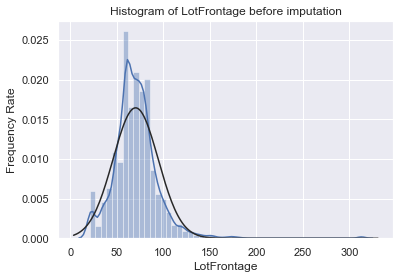

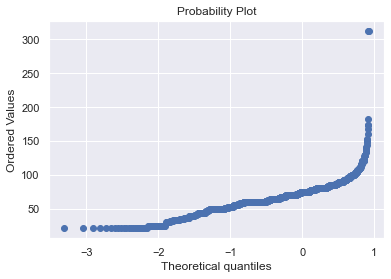

<Figure size 432x288 with 0 Axes>

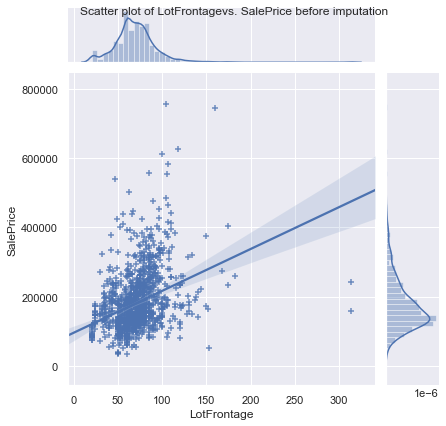

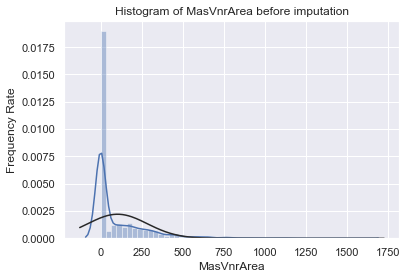

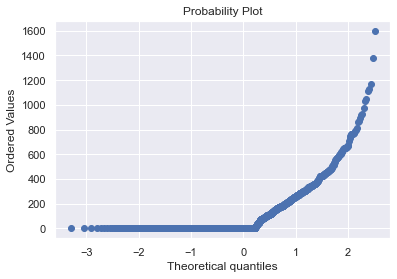

<Figure size 432x288 with 0 Axes>

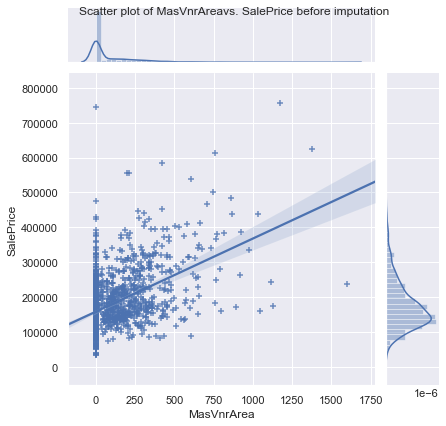

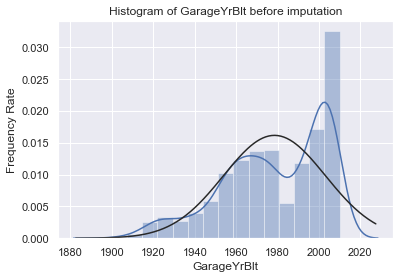

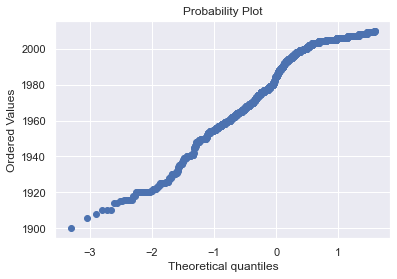

<Figure size 432x288 with 0 Axes>

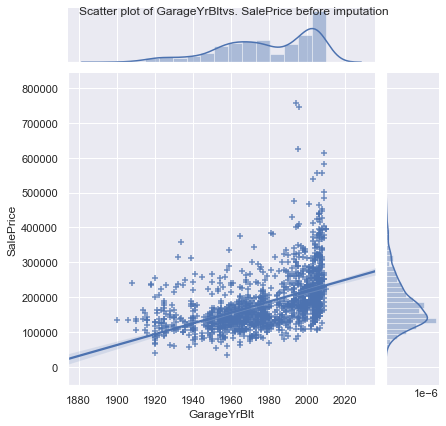

<Figure size 432x288 with 0 Axes>

In [19]:
visualise_floats(dataframe=train
          ,variables=floats_with_nulls
          ,target="SalePrice")

LotFrontage  MasVnrArea  GarageYrBlt
0            65.0       196.0       2003.0
1            80.0         0.0       1976.0
2            68.0       162.0       2001.0
3            60.0         0.0       1998.0
4            84.0       350.0       2000.0
...           ...         ...          ...
1455         62.0         0.0       1999.0
1456         85.0       119.0       1978.0
1457         66.0         0.0       1941.0
1458         68.0         0.0       1950.0
1459         75.0         0.0       1965.0

[1460 rows x 3 columns]

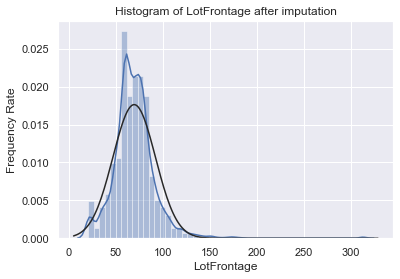

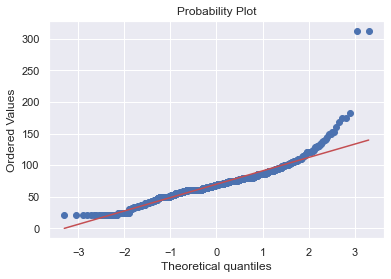

<Figure size 432x288 with 0 Axes>

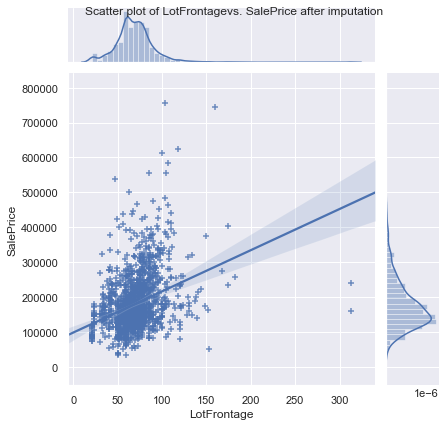

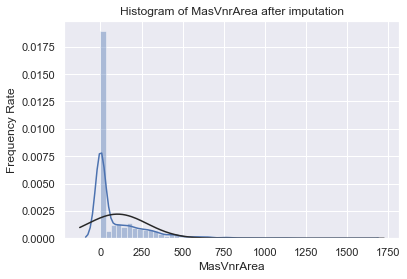

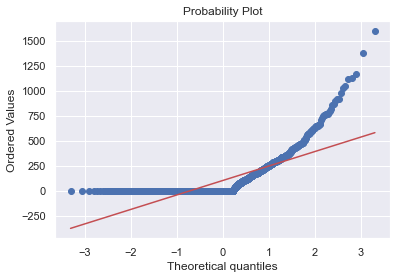

<Figure size 432x288 with 0 Axes>

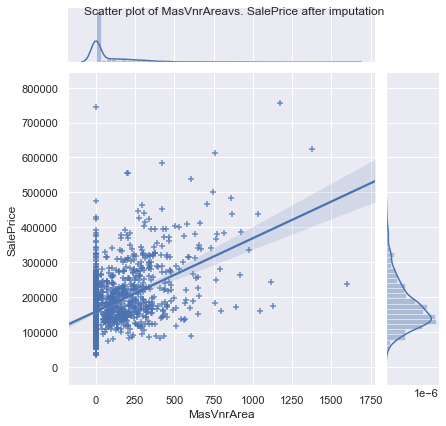

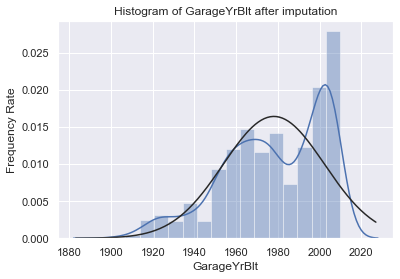

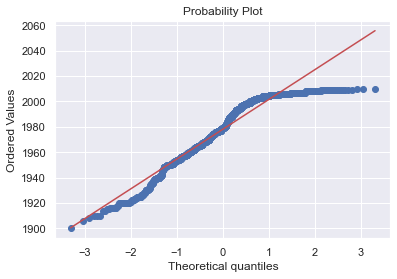

<Figure size 432x288 with 0 Axes>

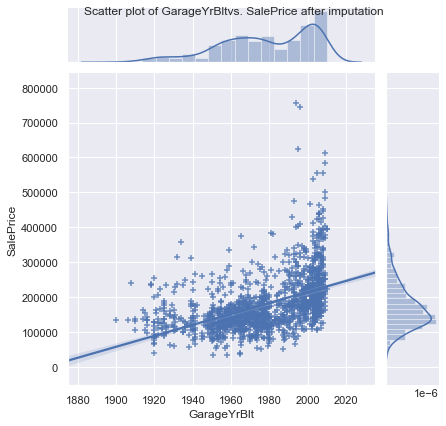

<Figure size 432x288 with 0 Axes>

In [20]:
floats_without_nulls = choose_imputer_and_visualise_floats(dataframe=train
                                                           ,variables=floats_with_nulls
                                                           ,target="SalePrice"
                                                           ,imputer=KNNImputer
                                                           ,strategy=None
                                                           ,weights="distance")
floats_without_nulls

### Summary statistics of Floats before imputation

In [21]:
#train[floats_with_nulls].describe()

In [22]:
before = pd.DataFrame(train[floats_with_nulls].isnull().sum())
before.T

LotFrontage  MasVnrArea  GarageYrBlt
0          259           8           81

### Summary statistics of Floats after imputation

In [23]:
#floats_without_nulls.describe()

In [24]:
after = pd.DataFrame(floats_without_nulls.isnull().sum())
after.T

LotFrontage  MasVnrArea  GarageYrBlt
0            0           0            0

## Category columns imputation

## Find Category columns with null values

In [25]:
category_with_nulls = pd.DataFrame(train.select_dtypes(include=['object']).isnull().sum()) > 0
category_with_nulls = category_with_nulls[category_with_nulls[0] == True].T.columns
category_with_nulls

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

### Print counts of unique values including Null values

In [26]:
count_unique_values(dataframe=train
                    ,variables=category_with_nulls)

Alley count distinct:
Grvl      50
Pave      41
nan     1369
dtype: int64

MasVnrType count distinct:
None       864
BrkFace    445
Stone      128
BrkCmn      15
nan          8
dtype: int64

BsmtQual count distinct:
TA     649
Gd     618
Ex     121
Fa      35
nan     37
dtype: int64

BsmtCond count distinct:
TA     1311
Gd       65
Fa       45
Po        2
nan      37
dtype: int64

BsmtExposure count distinct:
No     953
Av     221
Gd     134
Mn     114
nan     38
dtype: int64

BsmtFinType1 count distinct:
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
nan     37
dtype: int64

BsmtFinType2 count distinct:
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
nan      38
dtype: int64

Electrical count distinct:
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
nan         1
dtype: int64

FireplaceQu count distinct:
Gd     380
TA     313
Fa      33
Ex      24
Po      20
nan    690
dtype: int64

GarageType count distinct:
Attchd     

Alley MasVnrType BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0     Grvl    BrkFace       Gd       TA           No          GLQ   
1     Grvl       None       Gd       TA           Gd          ALQ   
2     Grvl    BrkFace       Gd       TA           Mn          GLQ   
3     Grvl       None       TA       Gd           No          ALQ   
4     Grvl    BrkFace       Gd       TA           Av          GLQ   
...    ...        ...      ...      ...          ...          ...   
1455  Grvl       None       Gd       TA           No          Unf   
1456  Grvl      Stone       Gd       TA           No          ALQ   
1457  Grvl       None       TA       Gd           No          GLQ   
1458  Grvl       None       TA       TA           Mn          GLQ   
1459  Grvl       None       TA       TA           No          BLQ   

     BsmtFinType2 Electrical FireplaceQu GarageType GarageFinish GarageQual  \
0             Unf      SBrkr          Gd     Attchd          RFn         TA   
1             Unf      SBrkr          TA     Attchd          RFn         TA   
2             Unf      SBrkr          TA     Attchd          RFn         TA   
3             Unf      SBrkr          Gd     Detchd          Unf         TA   
4             Unf      SBrkr          TA     Attchd          RFn         TA   
...           ...        ...         ...        ...          ...        ...   
1455          Unf      SBrkr          TA     Attchd          RFn         TA   
1456          Rec      SBrkr          TA     Attchd          Unf         TA   
1457          Unf      SBrkr          Gd     Attchd          RFn         TA   
1458          Rec      FuseA          Gd     Attchd          Unf         TA   
1459          LwQ      SBrkr          Gd     Attchd          Fin         TA   

     GarageCond PoolQC  Fence MiscFeature  
0            TA     Gd  MnPrv        Shed  
1            TA     Gd  MnPrv        Shed  
2            TA     Gd  MnPrv        Shed  
3            TA     Gd  MnPrv        Shed  
4            TA     Gd  MnPrv        Shed  
...         ...    ...    ...         ...  
1455         TA     Gd  MnPrv        Shed  
1456         TA     Gd  MnPrv        Shed  
1457         TA     Gd  GdPrv        Shed  
1458         TA     Gd  MnPrv        Shed  
1459         TA     Gd  MnPrv        Shed  

[1460 rows x 16 columns]

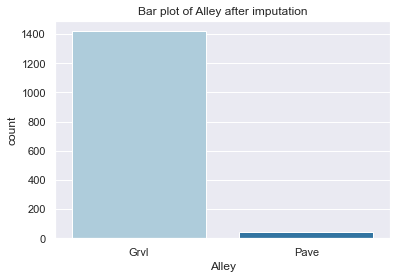

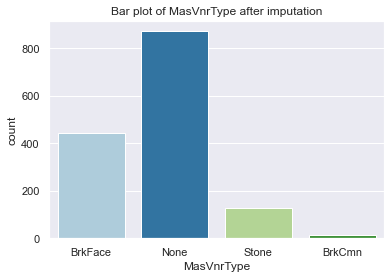

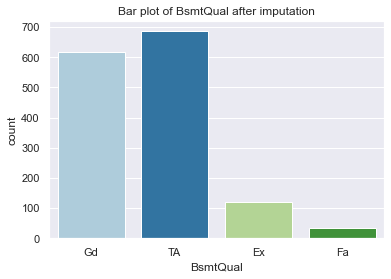

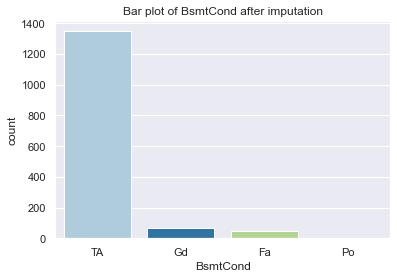

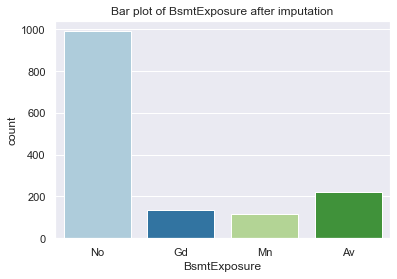

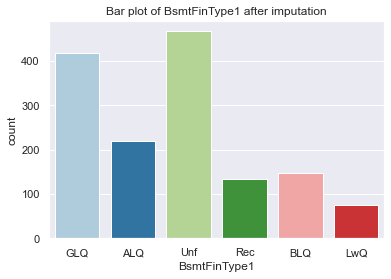

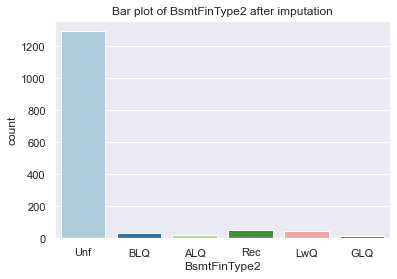

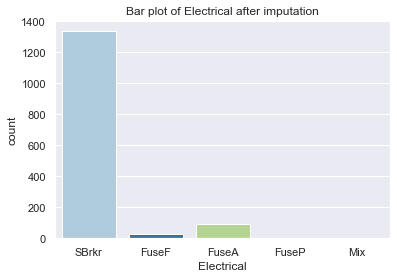

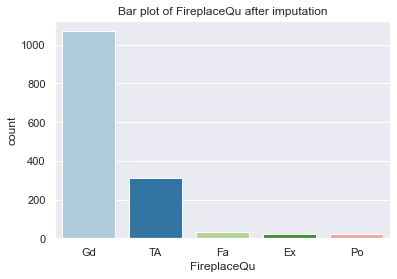

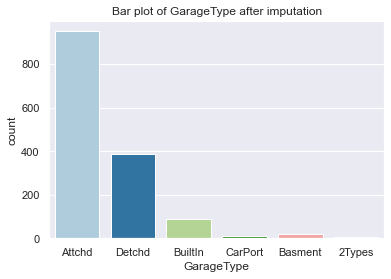

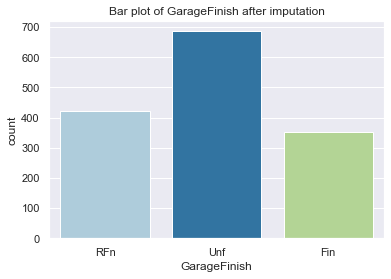

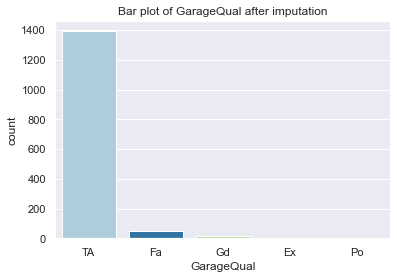

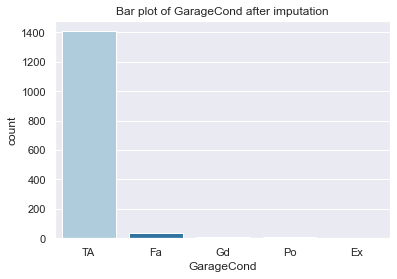

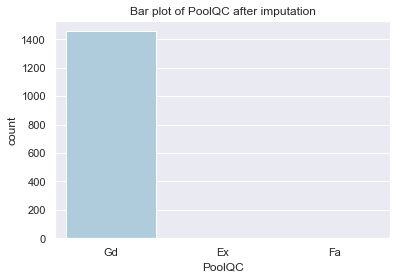

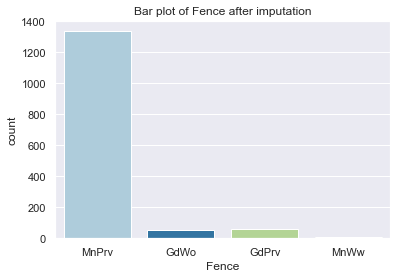

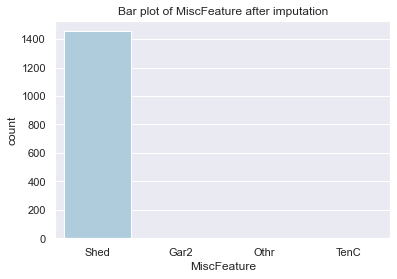

<Figure size 432x288 with 0 Axes>

In [27]:
category_without_nulls = choose_imputer_and_visualise_categories(dataframe=train
                                                                ,variables=category_with_nulls
                                                                ,target=None
                                                                ,imputer=SimpleImputer
                                                                ,strategy="most_frequent"
                                                                ,weights=None)
category_without_nulls

### Summary statistics of Categories before imputation

In [28]:
#train[category_with_nulls].describe()

In [29]:
before = pd.DataFrame(train[category_with_nulls].isnull().sum())
#before.T

### Summary statistics of Categories after imputation

In [30]:
#category_without_nulls.describe()

In [31]:
after = pd.DataFrame(category_without_nulls.isnull().sum())
#after.T

In [32]:
target = train.iloc[:,-1]

In [33]:
target

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

## Replacing original columns with imputed one

#### Replacing Floats

In [34]:
floats_without_nulls.columns

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [35]:
train[floats_without_nulls.columns] = floats_without_nulls

#### Replacing Categories

In [36]:
category_without_nulls.columns

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

In [37]:
train[category_without_nulls.columns] = category_without_nulls

## Feature engineering

### Copy of Train

In [38]:
train_imputed = train.copy()
#train_imputed

In [39]:
# preprocessing.PolynomialFeatures([degree, …])
# Generate polynomial and interaction features.

In [40]:
#train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [41]:
#train.fillna(0, inplace=True)
#train

In [42]:
#np.any(np.isnan(train))

In [43]:
#np.all(np.isfinite(train))

In [44]:
features_floats = pd.DataFrame(train.select_dtypes(include=['float64'])).columns[:-1]

In [45]:
features_floats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [46]:
features_objects = pd.DataFrame(train.select_dtypes(include=['object'])).columns

In [47]:
features_objects

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

### Polynomial

In [48]:
#poly = PolynomialFeatures(2, interaction_only=False)
#fitted = poly.fit_transform(train[features_floats])
poly = PolynomialFeatures(2, interaction_only=False).fit(train[features_floats])
fitted = poly.transform(train[features_floats])

In [49]:
fitted = pd.DataFrame(fitted, columns=poly.get_feature_names())
#fitted

In [50]:
train = pd.concat([train, fitted], axis=1)
#train

In [51]:
train.shape

(1460, 783)

In [52]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       ...
       'x32^2', 'x32 x33', 'x32 x34', 'x32 x35', 'x33^2', 'x33 x34', 'x33 x35',
       'x34^2', 'x34 x35', 'x35^2'],
      dtype='object', length=783)

In [53]:
print(pd.DataFrame(train.columns).count())
print(pd.DataFrame(train.columns).nunique())

0    783
dtype: int64
0    783
dtype: int64


### Deviations

In [54]:
#train.describe()

In [55]:
train.isnull().sum().sort_values(ascending=False)

x35^2         0
x3 x25        0
x4 x15        0
x4 x14        0
x4 x13        0
             ..
x13 x25       0
x13 x24       0
x13 x23       0
x13 x22       0
MSSubClass    0
Length: 783, dtype: int64

In [56]:
train = add_deviation_features(train.drop(columns=["SalePrice"])
                               ,variables_floats=features_floats
                               ,variables_objects=features_objects)
#train

In [57]:
train.shape

(1460, 2330)

In [58]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       ...
       'SaleCondition_DEVIATION_GarageArea',
       'SaleCondition_DEVIATION_WoodDeckSF',
       'SaleCondition_DEVIATION_OpenPorchSF',
       'SaleCondition_DEVIATION_EnclosedPorch',
       'SaleCondition_DEVIATION_3SsnPorch',
       'SaleCondition_DEVIATION_ScreenPorch',
       'SaleCondition_DEVIATION_PoolArea', 'SaleCondition_DEVIATION_MiscVal',
       'SaleCondition_DEVIATION_MoSold', 'SaleCondition_DEVIATION_YrSold'],
      dtype='object', length=2330)

In [59]:
print(pd.DataFrame(train.columns).count())
print(pd.DataFrame(train.columns).nunique())

0    2330
dtype: int64
0    2330
dtype: int64


### Log transforming skew variables

In [60]:
#train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [61]:
#train.fillna(0, inplace=True)
#train

In [62]:
train[train.select_dtypes(include=['uint8']).columns] = train[train.select_dtypes(include=['uint8']).columns].astype(float)

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 2330 entries, MSSubClass to SaleCondition_DEVIATION_YrSold
dtypes: float64(2287), object(43)
memory usage: 26.0+ MB


In [64]:
mask = train.dtypes == np.float
float_columns = train.columns[mask]

skew_limit = 0.75
skew_values = train[float_columns].skew()
skew_values

MSSubClass                              1.407657
LotFrontage                             2.245801
LotArea                                12.207688
OverallQual                             0.216944
OverallCond                             0.693067
                                         ...    
SaleCondition_DEVIATION_ScreenPorch     4.089773
SaleCondition_DEVIATION_PoolArea       18.340201
SaleCondition_DEVIATION_MiscVal        20.937577
SaleCondition_DEVIATION_MoSold          0.215583
SaleCondition_DEVIATION_YrSold          0.103986
Length: 2287, dtype: float64

In [65]:
skew_columns = (skew_values
                .sort_values(ascending=False)
                .to_frame()
                .rename(columns={0:'Skew'})
                .query('abs(Skew) > {}'.format(skew_limit)))

#skew_columns.T

In [66]:
for column in skew_columns.index.values:
    if column == "SalePrice":
        continue
    train[column] = train[column].apply(np.log1p)

In [67]:
train.shape

(1460, 2330)

In [68]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       ...
       'SaleCondition_DEVIATION_GarageArea',
       'SaleCondition_DEVIATION_WoodDeckSF',
       'SaleCondition_DEVIATION_OpenPorchSF',
       'SaleCondition_DEVIATION_EnclosedPorch',
       'SaleCondition_DEVIATION_3SsnPorch',
       'SaleCondition_DEVIATION_ScreenPorch',
       'SaleCondition_DEVIATION_PoolArea', 'SaleCondition_DEVIATION_MiscVal',
       'SaleCondition_DEVIATION_MoSold', 'SaleCondition_DEVIATION_YrSold'],
      dtype='object', length=2330)

In [69]:
print(pd.DataFrame(train.columns).count())
print(pd.DataFrame(train.columns).nunique())

0    2330
dtype: int64
0    2330
dtype: int64


### Scaler

In [70]:
# preprocessing.RobustScaler(*[, …])
# Scale features using statistics that are robust to outliers.

In [71]:
#train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [72]:
#train.fillna(0, inplace=True)
#train

In [73]:
#features = pd.DataFrame(train.select_dtypes(include=['float64'])).columns

In [74]:
#features

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
#S = StandardScaler(copy=False)
#fitted = S.fit_transform(train[features_floats])
S = StandardScaler().fit(train[features_floats])
fitted = S.transform(train[features_floats])

In [77]:
fitted.shape

(1460, 36)

In [78]:
fitted = pd.DataFrame(fitted, columns=features_floats)

In [79]:
#train = pd.concat([train, fitted], axis=1)
train.update(fitted)
train

MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0       0.424462       RL    -0.056154 -0.133270   Pave  Grvl      Reg   
1      -1.125202       RL     0.577512  0.113413   Pave  Grvl      Reg   
2       0.424462       RL     0.081387  0.420049   Pave  Grvl      IR1   
3       0.645073       RL    -0.299914  0.103317   Pave  Grvl      IR1   
4       0.424462       RL     0.726657  0.878431   Pave  Grvl      IR1   
...          ...      ...          ...       ...    ...   ...      ...   
1455    0.424462       RL    -0.200094 -0.259231   Pave  Grvl      Reg   
1456   -1.125202       RL     0.762846  0.725429   Pave  Grvl      Reg   
1457    0.645073       RL    -0.009625 -0.002359   Pave  Grvl      Reg   
1458   -1.125202       RL     0.081387  0.136833   Pave  Grvl      Reg   
1459   -1.125202       RL     0.380365  0.180116   Pave  Grvl      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story     0.651479    -0.517200   1.050994   
1          Norm     1Fam     1Story    -0.071836     2.179628   0.156734   
2          Norm     1Fam     2Story     0.651479    -0.517200   0.984752   
3          Norm     1Fam     2Story     0.651479    -0.517200  -1.863632   
4          Norm     1Fam     2Story     1.374795    -0.517200   0.951632   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story    -0.071836    -0.517200   0.918511   
1456       Norm     1Fam     1Story    -0.071836     0.381743   0.222975   
1457       Norm     1Fam     2Story     0.651479     3.078570  -1.002492   
1458       Norm     1Fam     1Story    -0.795151     0.381743  -0.704406   
1459       Norm     1Fam     1Story    -0.795151     0.381743  -0.207594   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0         0.878668     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1        -0.429577     Gable  CompShg     MetalSd     MetalSd       None   
2         0.830215     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3        -0.720298     Gable  CompShg     Wd Sdng     Wd Shng       None   
4         0.733308     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455      0.733308     Gable  CompShg     VinylSd     VinylSd       None   
1456      0.151865     Gable  CompShg     Plywood     Plywood      Stone   
1457      1.024029     Gable  CompShg     CemntBd     CmentBd       None   
1458      0.539493       Hip  CompShg     MetalSd     MetalSd       None   
1459     -0.962566     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0       1.195433        Gd        TA      PConc       Gd       TA   
1      -0.814447        TA        TA     CBlock       Gd       TA   
2       1.123360        Gd        TA      PConc       Gd       TA   
3      -0.814447        TA        TA     BrkTil       TA       Gd   
4       1.415162        Gd        TA      PConc       Gd 

In [80]:
train.shape

(1460, 2330)

In [81]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       ...
       'SaleCondition_DEVIATION_GarageArea',
       'SaleCondition_DEVIATION_WoodDeckSF',
       'SaleCondition_DEVIATION_OpenPorchSF',
       'SaleCondition_DEVIATION_EnclosedPorch',
       'SaleCondition_DEVIATION_3SsnPorch',
       'SaleCondition_DEVIATION_ScreenPorch',
       'SaleCondition_DEVIATION_PoolArea', 'SaleCondition_DEVIATION_MiscVal',
       'SaleCondition_DEVIATION_MoSold', 'SaleCondition_DEVIATION_YrSold'],
      dtype='object', length=2330)

In [82]:
print(pd.DataFrame(train.columns).count())
print(pd.DataFrame(train.columns).nunique())

0    2330
dtype: int64
0    2330
dtype: int64


### DUMMY VARIABLES

In [83]:
categories = pd.DataFrame(train.select_dtypes(include=['object']))
#categories

In [84]:
#categories.describe()

### One-hot encoding

In [85]:
one_hot_encode_cols = categories.dtypes[categories.dtypes == np.object]
one_hot_encode_cols = one_hot_encode_cols.index.tolist()
#pd.DataFrame(one_hot_encode_cols).T

In [86]:
train = pd.get_dummies(data=train
                       ,columns=one_hot_encode_cols
                       ,drop_first=True)

In [87]:
train.shape

(1460, 2496)

In [88]:
train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=2496)

In [89]:
print(pd.DataFrame(train.columns).count())
print(pd.DataFrame(train.columns).nunique())

0    2496
dtype: int64
0    2496
dtype: int64


## Feature selection

In [90]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html
#https://scikit-learn.org/stable/modules/feature_selection.html#variance-threshold

In [91]:
variables=train.columns
variables

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=2496)

### Variance Threshold

In [92]:
#pd.DataFrame(train.var().sort_values(ascending=True)).T

In [93]:
train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [94]:
train.fillna(0, inplace=True)
#train

In [95]:
from sklearn.feature_selection import VarianceThreshold
X = train
#vt = VarianceThreshold(threshold=(.8 * (1 - .8)))
vt = VarianceThreshold(threshold=0.25)
X_vt = vt.fit_transform(X)
print(vt.get_params())
print(vt.get_support(indices=True))

{'threshold': 0.25}
[   0    1    2 ... 2280 2285 2286]


In [96]:
train_reduced_by_variance = train[train.columns[vt.get_support(indices=True)]]
#train_reduced_by_variance

In [97]:
train_reduced_by_variance.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleCondition_DEVIATION_TotRmsAbvGrd',
       'SaleCondition_DEVIATION_Fireplaces',
       'SaleCondition_DEVIATION_GarageYrBlt',
       'SaleCondition_DEVIATION_GarageCars',
       'SaleCondition_DEVIATION_GarageArea',
       'SaleCondition_DEVIATION_WoodDeckSF',
       'SaleCondition_DEVIATION_OpenPorchSF',
       'SaleCondition_DEVIATION_EnclosedPorch',
       'SaleCondition_DEVIATION_MoSold', 'SaleCondition_DEVIATION_YrSold'],
      dtype='object', length=1841)

In [98]:
train = train_reduced_by_variance

In [99]:
train.shape

(1460, 1841)

In [100]:
train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleCondition_DEVIATION_TotRmsAbvGrd',
       'SaleCondition_DEVIATION_Fireplaces',
       'SaleCondition_DEVIATION_GarageYrBlt',
       'SaleCondition_DEVIATION_GarageCars',
       'SaleCondition_DEVIATION_GarageArea',
       'SaleCondition_DEVIATION_WoodDeckSF',
       'SaleCondition_DEVIATION_OpenPorchSF',
       'SaleCondition_DEVIATION_EnclosedPorch',
       'SaleCondition_DEVIATION_MoSold', 'SaleCondition_DEVIATION_YrSold'],
      dtype='object', length=1841)

In [101]:
print(pd.DataFrame(train.columns).count())
print(pd.DataFrame(train.columns).nunique())

0    1841
dtype: int64
0    1841
dtype: int64


## Tree-based feature selection

In [102]:
from sklearn.tree import ExtraTreeRegressor
#from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
X = train
y = target
X.shape

clf = ExtraTreeRegressor()
clf = clf.fit(X, y)
#clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
#X_new = model.transform(X)
#X_new.shape

In [103]:
train_reduced_by_tree = train[train.columns[model.get_support(indices=True)]]

In [104]:
train = train_reduced_by_tree

In [105]:
train.shape

(1460, 89)

In [106]:
train.columns

Index(['KitchenAbvGr', 'x0 x35', 'x1 x2', 'x1 x26', 'x2 x3', 'x2 x22',
       'x2 x25', 'x3 x4', 'x3 x5', 'x3 x11', 'x3 x15', 'x3 x18', 'x6 x31',
       'x8^2', 'x8 x23', 'x8 x25', 'x11 x12', 'x11 x15', 'x11 x22', 'x11 x26',
       'x11 x34', 'x11 x35', 'x12 x15', 'x12 x20', 'x15 x25', 'x15 x26',
       'x15 x30', 'x16 x25', 'x19 x25', 'x26 x27', 'x27 x28',
       'MSZoning_DEVIATION_MSSubClass', 'MSZoning_DEVIATION_BsmtFinSF1',
       'MSZoning_DEVIATION_1stFlrSF', 'MSZoning_DEVIATION_OpenPorchSF',
       'Street_DEVIATION_TotalBsmtSF', 'Street_DEVIATION_FullBath',
       'LotShape_DEVIATION_WoodDeckSF', 'Utilities_DEVIATION_OverallQual',
       'LotConfig_DEVIATION_OverallQual', 'LandSlope_DEVIATION_GrLivArea',
       'Condition2_DEVIATION_BsmtUnfSF', 'HouseStyle_DEVIATION_OverallCond',
       'HouseStyle_DEVIATION_YearBuilt', 'HouseStyle_DEVIATION_1stFlrSF',
       'Exterior1st_DEVIATION_YearBuilt', 'Exterior1st_DEVIATION_FullBath',
       'MasVnrType_DEVIATION_OverallQual', 'MasVnr

In [107]:
print(pd.DataFrame(train.columns).count())
print(pd.DataFrame(train.columns).nunique())

0    89
dtype: int64
0    89
dtype: int64


### Correlations

In [108]:
# plt.subplots(figsize=(30,30))
# matrix = np.triu(train.corr())
# sns_plot = sns.heatmap(train.corr(), annot=True, mask=matrix)
# fig = sns_plot.get_figure()
# fig.savefig("corr_matrix.jpg")

### Corralation against Target

In [109]:
# target_train = pd.concat([target,train],axis=1)

In [110]:
# corr_target = target_train[target_train.columns].corr()['SalePrice'][:-1]
# pd.DataFrame(corr_target.sort_values(ascending=False)).T

In [111]:
# plt.subplots(figsize=(5,10))
# sns_plot = sns.heatmap(corr_target.sort_values(ascending=False).to_frame(),annot=True, annot_kws={'size':12},cmap="GnBu")
# plt.show()
# fig = sns_plot.get_figure()
# fig.savefig("corr_target.jpg")

### Pairplot

In [112]:
# plt.subplots(figsize=(30,30))
# sns.set_context('notebook')
# sns.set_style('white')
# fig = sns.pairplot(target_train)
# fig.savefig("pairplot.jpg")
# plt.clf()

In [113]:
#Image(filename='pairplot.jpg') # Show pairplot as image

# Test set cleaning and feature engineering

In [114]:
test = pd.read_csv('test.csv')
test_index = test["Id"]
test_index

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [115]:
test = test.drop(columns="Id", axis=1)
#test

In [116]:
#test.describe()

In [117]:
floats_with_nulls = pd.DataFrame(test.select_dtypes(include=['float64']).isnull().sum()) > 0
floats_with_nulls = floats_with_nulls[floats_with_nulls[0] == True].T.columns
floats_with_nulls

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

LotFrontage  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0            80.0         0.0       468.0       144.0      270.0        882.0   
1            81.0       108.0       923.0         0.0      406.0       1329.0   
2            74.0         0.0       791.0         0.0      137.0        928.0   
3            78.0        20.0       602.0         0.0      324.0        926.0   
4            43.0         0.0       263.0         0.0     1017.0       1280.0   
...           ...         ...         ...         ...        ...          ...   
1454         21.0         0.0         0.0         0.0      546.0        546.0   
1455         21.0         0.0       252.0         0.0      294.0        546.0   
1456        160.0         0.0      1224.0         0.0        0.0       1224.0   
1457         62.0         0.0       337.0         0.0      575.0        912.0   
1458         74.0        94.0       758.0         0.0      238.0        996.0   

      BsmtFullBath  BsmtHalfBath  GarageYrBlt  GarageCars  GarageArea  
0              0.0           0.0  1961.000000         1.0       730.0  
1              0.0           0.0  1958.000000         1.0       312.0  
2              0.0           0.0  1997.000000         2.0       482.0  
3              0.0           0.0  1998.000000         2.0       470.0  
4              0.0           0.0  1992.000000         2.0       506.0  
...            ...           ...          ...         ...         ...  
1454           0.0           0.0  1933.278445         0.0         0.0  
1455           0.0           0.0  1970.000000         1.0       286.0  
1456           1.0           0.0  1960.000000         2.0       576.0  
1457           0.0           1.0  1930.271361         0.0         0.0  
1458           0.0           0.0  1993.000000         3.0       650.0  

[1459 rows x 11 columns]

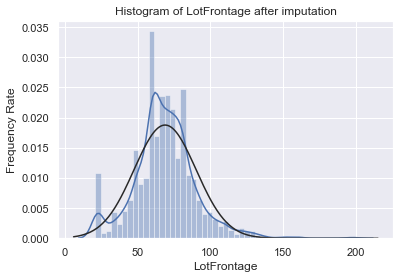

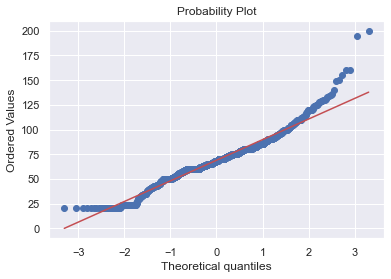

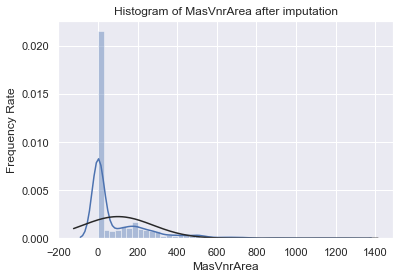

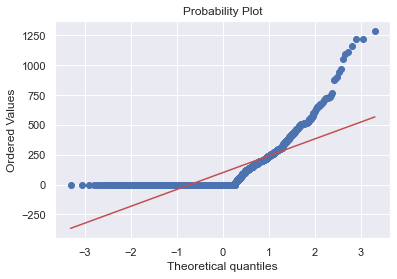

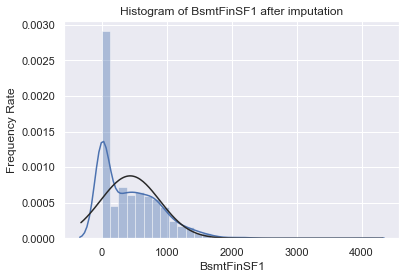

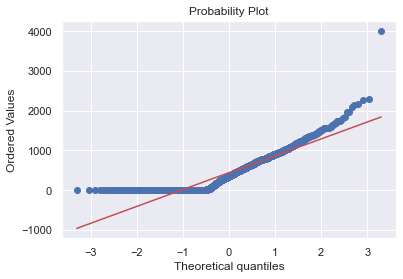

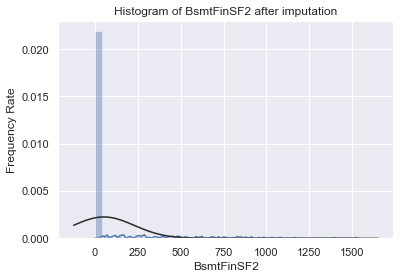

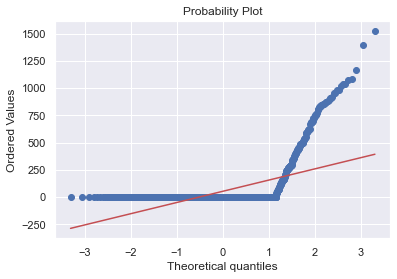

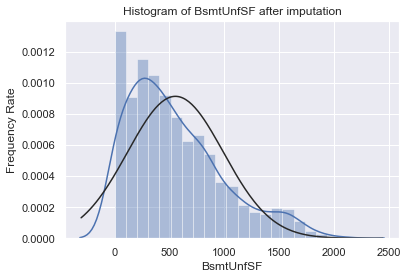

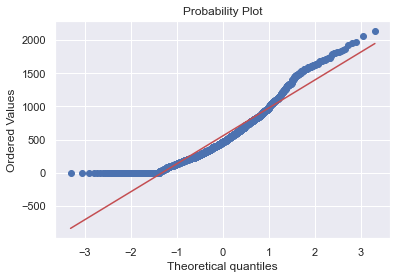

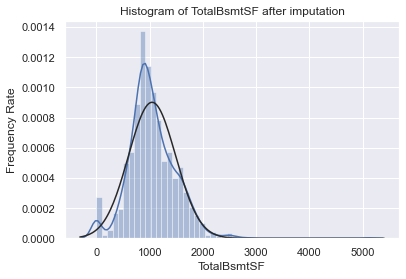

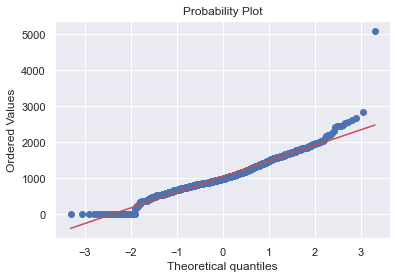

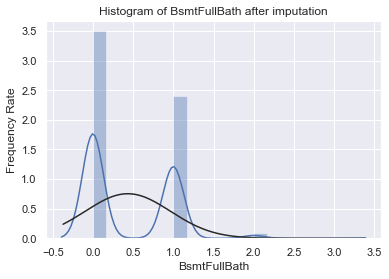

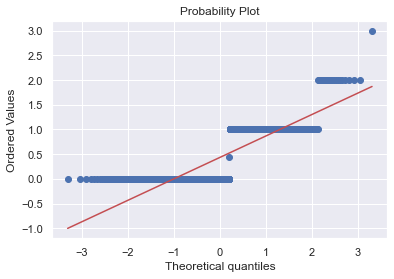

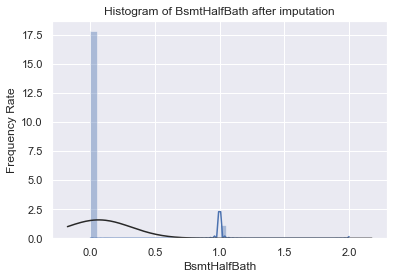

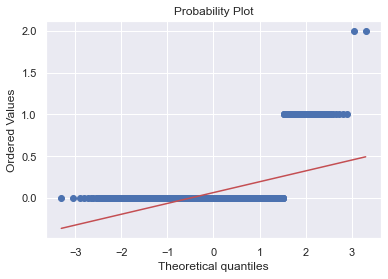

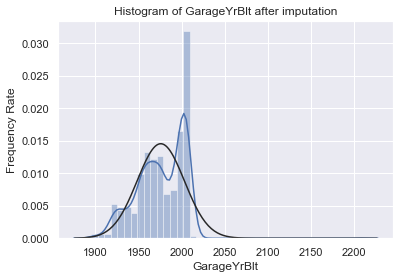

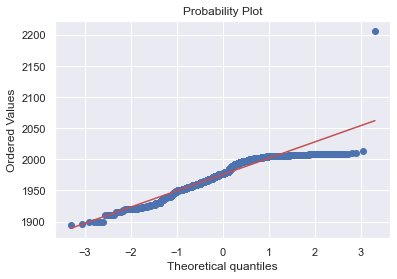

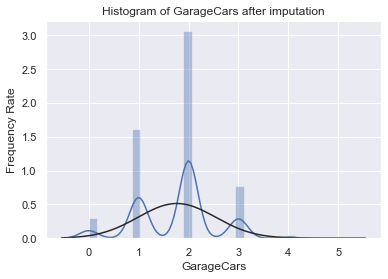

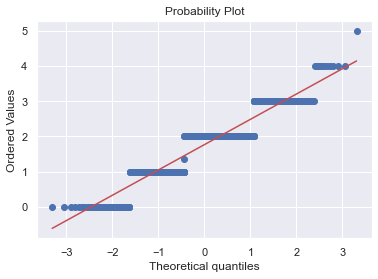

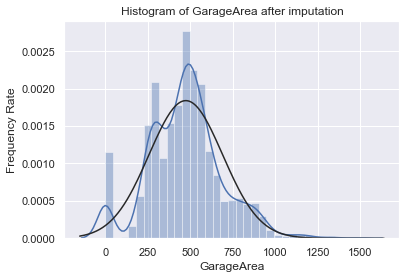

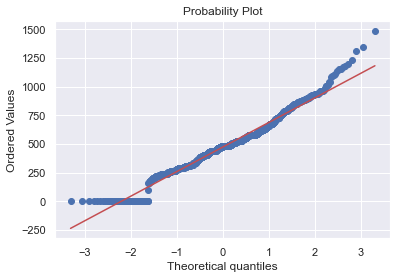

<Figure size 432x288 with 0 Axes>

In [118]:
floats_without_nulls = choose_imputer_and_visualise_floats(dataframe=test
                                                           ,variables=floats_with_nulls
                                                           ,target=None
                                                           ,imputer=KNNImputer
                                                           ,strategy=None
                                                           ,weights="distance")
floats_without_nulls

In [119]:
#pd.DataFrame(floats_without_nulls.isnull().sum() > 0).T

In [120]:
category_with_nulls = pd.DataFrame(test.select_dtypes(include=['object']).isnull().sum()) > 0
category_with_nulls = category_with_nulls[category_with_nulls[0] == True].T.columns
category_with_nulls

Index(['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')

MSZoning Alley Utilities Exterior1st Exterior2nd MasVnrType BsmtQual  \
0          RH  Grvl    AllPub     VinylSd     VinylSd       None       TA   
1          RL  Grvl    AllPub     Wd Sdng     Wd Sdng    BrkFace       TA   
2          RL  Grvl    AllPub     VinylSd     VinylSd       None       Gd   
3          RL  Grvl    AllPub     VinylSd     VinylSd    BrkFace       TA   
4          RL  Grvl    AllPub     HdBoard     HdBoard       None       Gd   
...       ...   ...       ...         ...         ...        ...      ...   
1454       RM  Grvl    AllPub     CemntBd     CmentBd       None       TA   
1455       RM  Grvl    AllPub     CemntBd     CmentBd       None       TA   
1456       RL  Grvl    AllPub     VinylSd     VinylSd       None       TA   
1457       RL  Grvl    AllPub     HdBoard     Wd Shng       None       Gd   
1458       RL  Grvl    AllPub     HdBoard     HdBoard    BrkFace       Gd   

     BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 KitchenQual Functional  \
0          TA           No          Rec          LwQ          TA        Typ   
1          TA           No          ALQ          Unf          Gd        Typ   
2          TA           No          GLQ          Unf          TA        Typ   
3          TA           No          GLQ          Unf          Gd        Typ   
4          TA           No          ALQ          Unf          Gd        Typ   
...       ...          ...          ...          ...         ...        ...   
1454       TA           No          Unf          Unf          TA        Typ   
1455       TA           No          Rec          Unf          TA        Typ   
1456       TA           No          ALQ          Unf          TA        Typ   
1457       TA           Av          GLQ          Unf          TA        Typ   
1458       TA           Av          LwQ          Unf          TA        Typ   

     FireplaceQu GarageType GarageFinish GarageQual GarageCond PoolQC  Fence  \
0             Gd     Attchd          Unf         TA         TA     Ex  MnPrv   
1             Gd     Attchd          Unf         TA         TA     Ex  MnPrv   
2             TA     Attchd          Fin         TA         TA     Ex  MnPrv   
3             Gd     Attchd          Fin         TA         TA     Ex  MnPrv   
4             Gd     Attchd          RFn         TA         TA     Ex  MnPrv   
...          ...        ...          ...        ...        ...    ...    ...   
1454          Gd     Attchd          Unf         TA         TA     Ex  MnPrv   
1455          Gd    CarPort          Unf         TA         TA     Ex  MnPrv   
1456          TA     Detchd          Unf         TA         TA     Ex  MnPrv   
1457          Gd     Attchd          Unf         TA         TA     Ex  MnPrv   
1458          TA     Attchd          Fin         TA         TA     Ex  MnPrv   

     MiscFeature SaleType  
0           Shed       WD  
1           Gar2       WD  
2           Shed       WD  
3           Shed       WD  
4           Shed       WD  
...          ...      ...  
1454        Shed       WD  
1455        Shed       WD  
1456        Shed       WD  
1457        Shed       WD  
1458        Shed       WD  

[1459 rows x 22 columns]

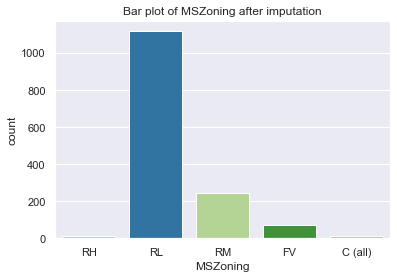

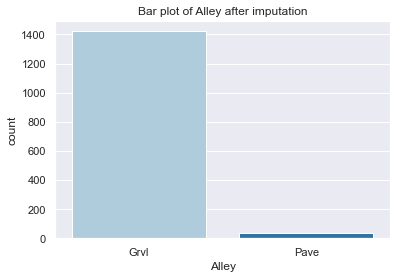

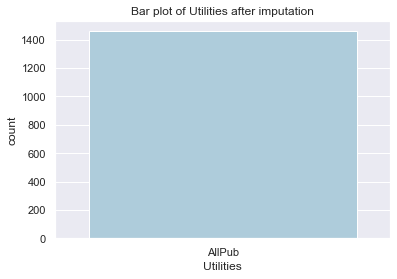

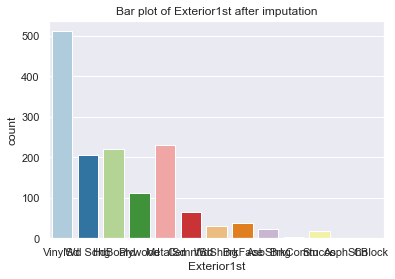

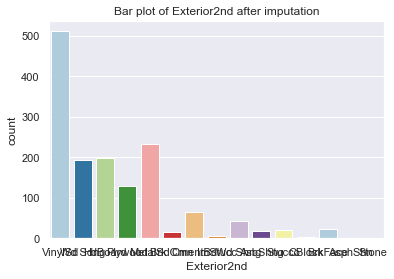

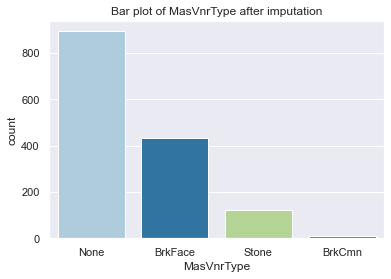

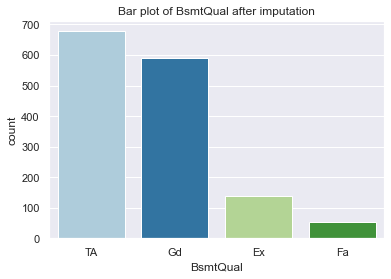

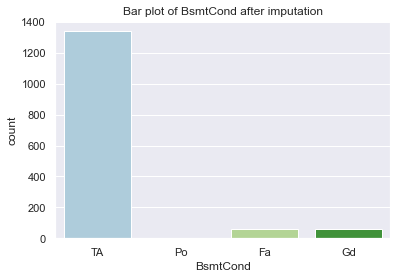

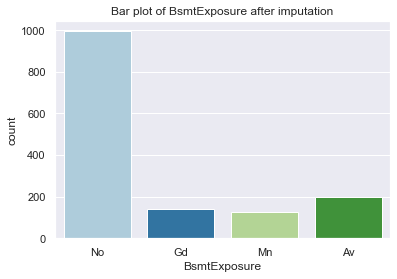

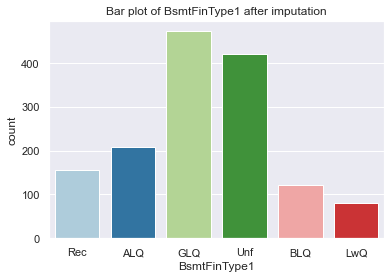

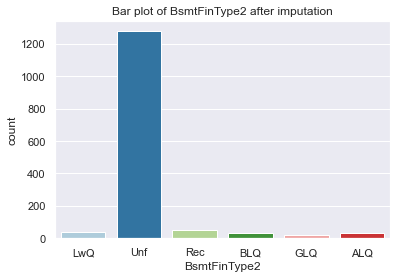

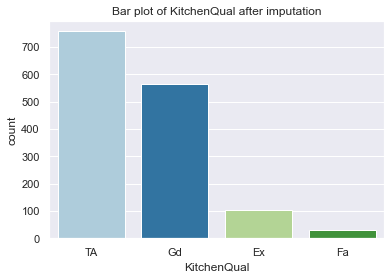

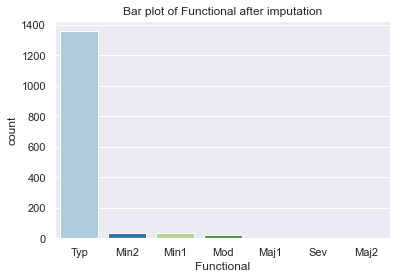

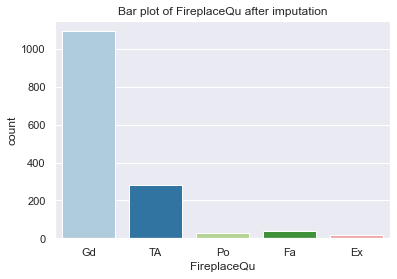

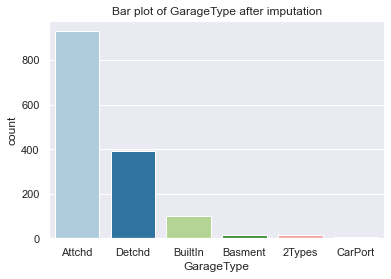

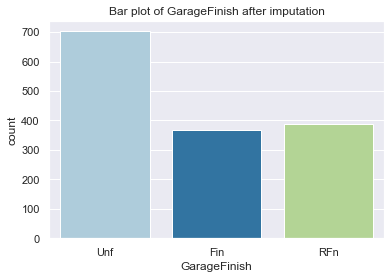

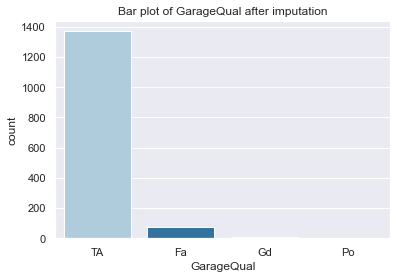

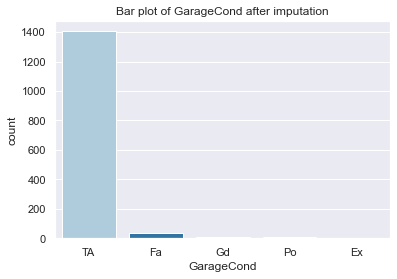

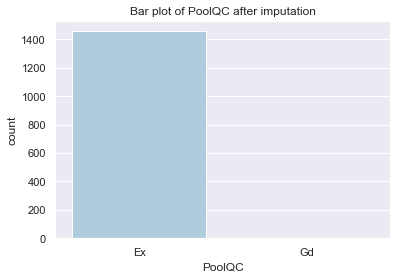

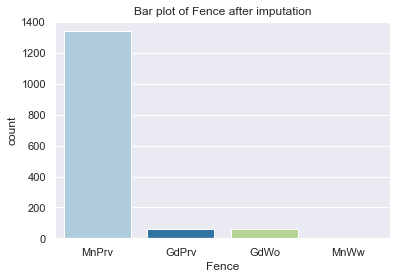

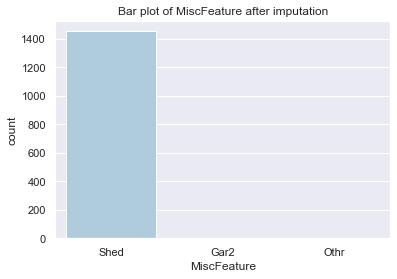

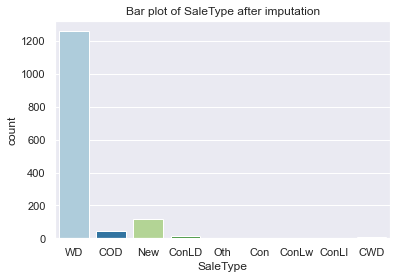

<Figure size 432x288 with 0 Axes>

In [121]:
category_without_nulls = choose_imputer_and_visualise_categories(dataframe=test
                                                                ,variables=category_with_nulls
                                                                ,target=None
                                                                ,imputer=SimpleImputer
                                                                ,strategy="most_frequent"
                                                                ,weights=None)
category_without_nulls

In [122]:
#pd.DataFrame(category_without_nulls.isnull().sum() > 0).T

### Replace columns with nulls by columns with imputed values

In [123]:
test[floats_without_nulls.columns] = floats_without_nulls
#test

In [124]:
test[category_without_nulls.columns] = category_without_nulls
#test

In [125]:
test.shape

(1459, 79)

In [126]:
test[test.select_dtypes(include=['int64', "uint8"]).columns] = test[test.select_dtypes(include=['int64', "uint8"]).columns].astype(float)

In [127]:
#test.info()

In [128]:
#features_floats = pd.DataFrame(test.select_dtypes(include=['float64'])).columns
features_floats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [129]:
#features_objects = pd.DataFrame(test.select_dtypes(include=['object'])).columns
features_objects

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

## Polynomials

In [130]:
#poly = PolynomialFeatures(2, interaction_only=False)
fitted = poly.transform(test[features_floats])

In [131]:
fitted = pd.DataFrame(fitted, columns=poly.get_feature_names())
#fitted

In [132]:
test = pd.concat([test, fitted], axis=1)
#test

In [133]:
test.shape

(1459, 782)

In [134]:
test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       ...
       'x32^2', 'x32 x33', 'x32 x34', 'x32 x35', 'x33^2', 'x33 x34', 'x33 x35',
       'x34^2', 'x34 x35', 'x35^2'],
      dtype='object', length=782)

In [135]:
print(pd.DataFrame(test.columns).count())
print(pd.DataFrame(test.columns).nunique())

0    782
dtype: int64
0    782
dtype: int64


## Deviations

In [136]:
test = add_deviation_features(test
                               ,variables_floats=features_floats
                               ,variables_objects=features_objects)
#test

In [137]:
# test.fillna(0, inplace=True)
#test

In [138]:
test.shape

(1459, 2330)

In [139]:
test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       ...
       'SaleCondition_DEVIATION_GarageArea',
       'SaleCondition_DEVIATION_WoodDeckSF',
       'SaleCondition_DEVIATION_OpenPorchSF',
       'SaleCondition_DEVIATION_EnclosedPorch',
       'SaleCondition_DEVIATION_3SsnPorch',
       'SaleCondition_DEVIATION_ScreenPorch',
       'SaleCondition_DEVIATION_PoolArea', 'SaleCondition_DEVIATION_MiscVal',
       'SaleCondition_DEVIATION_MoSold', 'SaleCondition_DEVIATION_YrSold'],
      dtype='object', length=2330)

In [140]:
print(pd.DataFrame(test.columns).count())
print(pd.DataFrame(test.columns).nunique())

0    2330
dtype: int64
0    2330
dtype: int64


## Log tranformation

In [141]:
mask = test.dtypes == np.float
float_columns = test.columns[mask]

skew_limit = 0.75
skew_values = test[float_columns].skew()
skew_values

MSSubClass                              1.346690
LotFrontage                             0.623983
LotArea                                 3.115217
OverallQual                             0.181196
OverallCond                             0.449165
                                         ...    
SaleCondition_DEVIATION_ScreenPorch     3.846291
SaleCondition_DEVIATION_PoolArea       18.337267
SaleCondition_DEVIATION_MiscVal        16.428941
SaleCondition_DEVIATION_MoSold          0.179839
SaleCondition_DEVIATION_YrSold          0.179440
Length: 2287, dtype: float64

In [142]:
skew_columns = (skew_values
                .sort_values(ascending=False)
                .to_frame()
                .rename(columns={0:'Skew'})
                .query('abs(Skew) > {}'.format(skew_limit)))

#skew_columns.T

In [143]:
for column in skew_columns.index.values:
    if column == "SalePrice":
        continue
    test[column] = test[column].apply(np.log1p)

In [144]:
test.shape

(1459, 2330)

In [145]:
test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       ...
       'SaleCondition_DEVIATION_GarageArea',
       'SaleCondition_DEVIATION_WoodDeckSF',
       'SaleCondition_DEVIATION_OpenPorchSF',
       'SaleCondition_DEVIATION_EnclosedPorch',
       'SaleCondition_DEVIATION_3SsnPorch',
       'SaleCondition_DEVIATION_ScreenPorch',
       'SaleCondition_DEVIATION_PoolArea', 'SaleCondition_DEVIATION_MiscVal',
       'SaleCondition_DEVIATION_MoSold', 'SaleCondition_DEVIATION_YrSold'],
      dtype='object', length=2330)

In [146]:
print(pd.DataFrame(test.columns).count())
print(pd.DataFrame(test.columns).nunique())

0    2330
dtype: int64
0    2330
dtype: int64


In [175]:
test.describe()

KitchenAbvGr       x0 x35        x1 x2       x1 x26        x2 x3  \
count   1459.000000  1459.000000  1459.000000  1459.000000  1459.000000   
mean      -0.018943    11.399231    13.258084     9.788899    10.853298   
std        0.976408     0.713226     0.788299     2.366767     0.585611   
min       -7.975078    10.599655    10.337573     0.000000     8.679482   
25%       -0.207607    10.601150    13.008144     9.871996    10.558439   
50%       -0.207607    11.517425    13.369225    10.316954    10.896758   
75%       -0.207607    11.853895    13.700730    10.672748    11.224806   
max        4.336072    12.852917    15.978834    12.246259    13.055726   

            x2 x22       x2 x25        x3 x4         x3 x5       x3 x11  \
count  1459.000000  1459.000000  1459.000000   1459.000000  1459.000000   
mean     10.905860     9.140471    33.607265  12010.668266     8.451507   
std       0.620180     2.250863     9.153993   2955.889006     1.534480   
min       8.391857     0.000000     2.000000   1951.000000     0.000000   
25%      10.645449     9.036106    30.000000   9800.000000     8.371242   
50%      10.982220     9.709357    35.000000  11808.000000     8.644178   
75%      11.290812    10.085017    40.000000  14021.000000     9.052633   
max      13.286777    12.066816    72.000000  20080.000000    10.838620   

            x3 x15       x3 x18       x6 x31         x8^2       x8 x23  \
count  1459.000000  1459.000000  1459.000000  1459.000000  1459.000000   
mean      9.028436     9.954078     1.219561     8.443499     2.461638   
std       0.506679     4.988459     3.746172     5.940994     3.202971   
min       6.598509     0.000000     0.000000     0.000000     0.000000   
25%       8.688201     5.000000     0.000000     0.000000     0.000000   
50%       9.036106    10.000000     0.000000    11.721581     0.000000   
75%       9.372119    14.000000     0.000000    13.245459     6.349125   
max      10.838620    30.000000    13.934765    16.593093     8.989818   

            x8 x25      x11 x12      x11 x15      x11 x22      x11 x26  \
count  1459.000000  1459.000000  1459.000000  1459.000000  1459.000000   
mean      4.483487    13.516640    13.767958     8.490147    12.076775   
std       3.294435     2.396166     2.413929     1.528060     3.508515   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000    13.434688    13.747728     8.391176    12.515236   
50%       6.186209    13.860775    14.139749     8.738896    12.999520   
75%       7.189922    14.395298    14.561230     9.040500    13.495119   
max       9.395242    17.072030    17.072030    11.244078    15.587005   

           x11 x34      x11 x35      x12 x15      x12 x20      x15 x25  \
count  1459.000000  1459.000000  1459.000000  1459.000000  1459.000000   
mean      8.344168    14.105746    14.252700     7.992985     7.408255   
std       1.573884     2.430128     0.565604     0.560573     1.838002   
min       0.000000     0.000000    12.017632     0.000000     0.000000   
25%       8.137103    14.268308    13.873750     7.728416     7.185384   
50%       8.652598    14.500080    14.223025     8.018625     7.886457   
75%       9.044993    14.778085    14.655298     8.324700     8.173293   
max      10.838620    16.140411    17.072030     9.857496     9.634693   

           x15 x26      x15 x30      x16 x25      x19 x25      x26 x27  \
count  1459.000000  1459.000000  1459.000000  1459.000000  1459.000000   
mean     12.703811     0.110828     0.439370     0.397576     5.290395   
std       3.038527     1.170116     0.561501     0.553615     5.687512   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      12.851942     0.000000     0.000000     0.000000     0.000000   
50%      13.394381     0.000000     0.000000     0.000000     0.000000   
75%      13.763145     0.000000     1.098612     1.098612    11.348107   
max      15.587005    13.149144     2.197225     2.197225    1

## Scaling

In [147]:
test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [148]:
#S = StandardScaler(copy=False)
fitted = S.transform(test[features_floats])

In [149]:
fitted = pd.DataFrame(fitted,columns=features_floats)

In [150]:
#test = pd.concat([test, fitted], axis=1)
test.update(fitted)
#test

In [151]:
test.shape

(1459, 2330)

In [152]:
test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       ...
       'SaleCondition_DEVIATION_GarageArea',
       'SaleCondition_DEVIATION_WoodDeckSF',
       'SaleCondition_DEVIATION_OpenPorchSF',
       'SaleCondition_DEVIATION_EnclosedPorch',
       'SaleCondition_DEVIATION_3SsnPorch',
       'SaleCondition_DEVIATION_ScreenPorch',
       'SaleCondition_DEVIATION_PoolArea', 'SaleCondition_DEVIATION_MiscVal',
       'SaleCondition_DEVIATION_MoSold', 'SaleCondition_DEVIATION_YrSold'],
      dtype='object', length=2330)

In [153]:
print(pd.DataFrame(test.columns).count())
print(pd.DataFrame(test.columns).nunique())

0    2330
dtype: int64
0    2330
dtype: int64


In [ ]:
test.describe()

## One-hot encoding

In [154]:
one_hot_encode_cols = category_without_nulls.dtypes[category_without_nulls.dtypes == np.object]
one_hot_encode_cols = one_hot_encode_cols.index.tolist()
#pd.DataFrame(one_hot_encode_cols).T

In [155]:
test = pd.get_dummies(data=test
                        ,columns=one_hot_encode_cols
                        ,drop_first=True)

In [156]:
test[test.select_dtypes(include=['uint8']).columns] = test[test.select_dtypes(include=['uint8']).columns].astype(float)

In [157]:
test.shape

(1459, 2402)

In [158]:
test.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       ...
       'MiscFeature_Othr', 'MiscFeature_Shed', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD'],
      dtype='object', length=2402)

In [159]:
print(pd.DataFrame(test.columns).count())
print(pd.DataFrame(test.columns).nunique())

0    2402
dtype: int64
0    2402
dtype: int64


### NULLS double check

In [160]:
train.shape

(1460, 89)

In [161]:
nulls = pd.DataFrame(train.isnull().sum()) > 0
nulls = nulls[nulls[0] == True].T.columns
nulls

Index([], dtype='object')

In [162]:
test.shape

(1459, 2402)

In [163]:
nulls = pd.DataFrame(test.isnull().sum()) > 0
nulls = nulls[nulls[0] == True].T.columns
nulls

Index(['MSZoning_DEVIATION_MSSubClass', 'MSZoning_DEVIATION_LotFrontage',
       'MSZoning_DEVIATION_LotArea', 'MSZoning_DEVIATION_OverallCond',
       'MSZoning_DEVIATION_MasVnrArea', 'MSZoning_DEVIATION_BsmtFinSF1',
       'MSZoning_DEVIATION_BsmtFinSF2', 'MSZoning_DEVIATION_BsmtUnfSF',
       'MSZoning_DEVIATION_1stFlrSF', 'MSZoning_DEVIATION_2ndFlrSF',
       ...
       'SaleCondition_DEVIATION_BsmtHalfBath',
       'SaleCondition_DEVIATION_KitchenAbvGr',
       'SaleCondition_DEVIATION_TotRmsAbvGrd',
       'SaleCondition_DEVIATION_Fireplaces',
       'SaleCondition_DEVIATION_WoodDeckSF',
       'SaleCondition_DEVIATION_OpenPorchSF',
       'SaleCondition_DEVIATION_3SsnPorch',
       'SaleCondition_DEVIATION_ScreenPorch',
       'SaleCondition_DEVIATION_PoolArea', 'SaleCondition_DEVIATION_MiscVal'],
      dtype='object', length=931)

# Test model

In [164]:
train.shape

(1460, 89)

In [165]:
print(pd.DataFrame(train.columns).count())
print(pd.DataFrame(train.columns).nunique())

0    89
dtype: int64
0    89
dtype: int64


In [166]:
test.shape

(1459, 2402)

In [167]:
print(pd.DataFrame(test.columns).count())
print(pd.DataFrame(test.columns).nunique())

0    2402
dtype: int64
0    2402
dtype: int64


### Columns intersection

In [168]:
#train.columns.intersection(test.columns)

In [169]:
#test.columns.intersection(train.columns)

In [170]:
from sklearn.ensemble import RandomForestRegressor

test.replace([np.inf, -np.inf], np.nan, inplace=True)
test.fillna(0, inplace=True)

train.replace([np.inf, -np.inf], np.nan, inplace=True)
train.fillna(0, inplace=True)

#X = train[test.columns]
test = test[train_reduced_by_tree.columns]
#X = train.columns.intersection(test.columns)
X = train
y = target

model = RandomForestRegressor(n_estimators=100, criterion="mae", max_depth=3, bootstrap=True, warm_start=True, random_state=0, n_jobs=-1)
model.fit(X, y)
preds = model.predict(test)

In [171]:
# Save test predictions to file
output = pd.DataFrame({'Id': test_index,
                       'SalePrice': preds})
output.to_csv('submission.csv', index=False)

Your Best Entry 
Your submission scored 16473.18615, which is an improvement of your previous score of 16644.83089. Great job!

https://www.kaggle.com/c/home-data-for-ml-course

* ~~tytuly wykresow - nazwy kolumn z pominieciem targetu~~
* ~~zamiana kolumn po imputowaniu z pominieciem targetu~~
* ~~czy wykresy printuja dane po transformacji? int a nie float ?~~

* ~~TEKSTOWE:~~
* ~~kolumny kategorie do dummy variables in_place=True~~
* NUMERYCZNE
* deviation miara -- def add_deviation_feature(X, feature, category):
* ~~potraktowanie logarytmem skosne zmienne~~
* zmienne wyzszego rzedu - Polynomial Features in Scikit-Learn
* interakacje miedzy zmiennymi
* ~~feature selection~~
* ~~macierz korelacji~~ 

* Brief description of the data set and a summary of its attributes
* Initial plan for data exploration
* Actions taken for data cleaning and feature engineering
* Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner
* Formulating at least 3 hypothesis about this data
* Conducting a formal significance test for one of the hypotheses and discuss the results
* Suggestions for next steps in analyzing this data
* A paragraph that summarizes the quality of this data set and a request for additional data if needed